# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022

## Libraries and datasets

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.ndimage import gaussian_filter1d

from t3_constants import *
from t3_utility import *

# KNN
## Training

In [51]:
with open(f'{PICKLE_FOLDER}{TRAIN}{X}.pkl', 'rb') as f:
    train_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TRAIN}{Y}.pkl', 'rb') as f:
    train_y = pickle.load(f)

In [52]:
# dictionary of parameters of model
param_d = {
    NNBR: range(1,50),
    WGH: ['uniform', 'distance']
}
# iteration on parameters to collect results
grid = itertools.product(*[param_d[key] for key in sorted(param_d)])
results = []
for n, weights in grid:
    model = KNeighborsClassifier(n_neighbors=n, weights=weights)
    mean_val_score, std_val_score = cross_validation_summary(model, train_x.values, train_y.values)
    res = n, weights, mean_val_score, std_val_score
    results.append(res)

# print top 5 combination results
results_df = pd.DataFrame(results, columns=sorted(param_d) + [MVS, SVS])
results_df.sort_values(MVS, ascending=False).head(8)

,n_neighbors,weights,mean_val_score,std_val_score
63,32,distance,0.928127,0.020814
49,25,distance,0.928102,0.016052
47,24,distance,0.928102,0.018975
71,36,distance,0.926527,0.018479
59,30,distance,0.926514,0.031766
57,29,distance,0.926502,0.023448
53,27,distance,0.926489,0.024013
65,33,distance,0.924927,0.021199


In [53]:
results_df.groupby(WGH).mean().sort_values(MVS, ascending=False)

,n_neighbors,mean_val_score,std_val_score
weights,,,
distance,25.0,0.916410,0.021864
uniform,25.0,0.906881,0.025169


In [54]:
results_df.groupby(NNBR).mean().sort_values(MVS, ascending=False)

,mean_val_score,std_val_score
n_neighbors,,
32,0.923321,0.025047
25,0.922514,0.019518
24,0.922508,0.018852
27,0.922495,0.027507
36,0.920927,0.024131
30,0.920914,0.031419
23,0.920127,0.017946
33,0.920127,0.026529
31,0.920121,0.021717


### Test Model

In [98]:
best_result = results_df.sort_values(MVS).tail(1)

# best model
test_model = KNeighborsClassifier(
    n_neighbors=best_result[NNBR].values[0],
    weights=best_result[WGH].values[0]
)

_ = test_model.fit(train_x, train_y)

## Testing

In [56]:
with open(f'{PICKLE_FOLDER}{TEST}{X}.pkl', 'rb') as f:
    test_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TEST}{Y}.pkl', 'rb') as f:
    test_y = pickle.load(f)

### Score

In [59]:
score = test_model.score(test_x, test_y)
score

0.8980891719745223

### Visualization

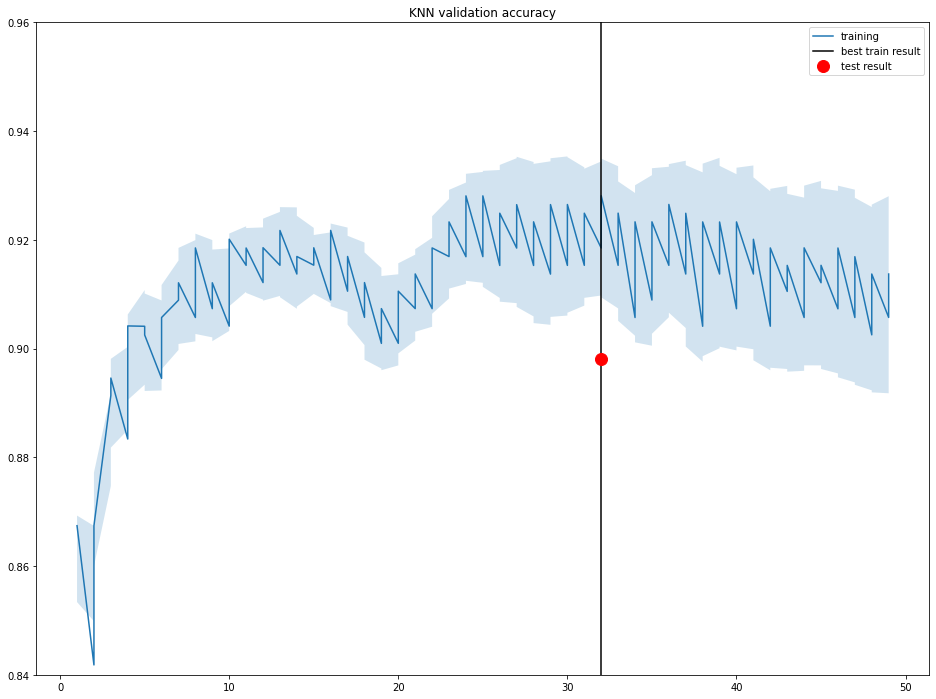

In [97]:
# plt.errorbar(tmp.n_neighbors, tmp.mean_val_score, tmp.std_val_score)
plt.figure(figsize=(16,12))
plt.plot(results_df[NNBR], results_df[MVS], label='training')
lower_bound = results_df[MVS] - results_df[SVS]/2
upper_bound = results_df[MVS] + results_df[SVS]/2
lower_bound = gaussian_filter1d(lower_bound, 1)
upper_bound = gaussian_filter1d(upper_bound, 1)
plt.fill_between(results_df[NNBR], lower_bound, upper_bound, alpha=0.2)
plt.plot([32,32], [0,1], color='black', label='best train result')
plt.ylim([0.84,0.96])

plt.plot([32], [score],'ro', linewidth=2, markersize=12, label='test result' )

plt.title('KNN validation accuracy')
plt.legend()
plt.show()